In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/ML/Python-for-Machine-Learning/00_Case_Study/Car_Data/Cars.csv')

In [3]:
df.shape

(8128, 13)

In [4]:
df1 = df.replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], [1, 2, 3, 4, 5])

In [5]:
df2 = df1[df1["fuel"].str.contains('CNG|LPG')==False]

In [6]:
df2['mileage'] = df2['mileage'].str.extract('(\d+\.\d+)').astype(float)

In [7]:
df2['engine'] = df2['engine'].str.extract('(\d+)').astype(float)
df2['max_power'] = df2['max_power'].str.extract('(\d+\.?\d+)').astype(float)

In [8]:
df3 = df2.drop(['torque'], axis=1)

In [9]:
df3["name"] = df3["name"].str.split().str[0]


In [10]:
df3.drop(df3[df3['owner'] == 5].index, inplace= True)


In [162]:
df3['selling_price_log'].max()


np.float64(16.11809565095832)

In [164]:
df3['selling_price_log'].min()

np.float64(10.308919326755392)

In [160]:
df3['selling_price_log'] = np.log(df3['selling_price'])

In [223]:
bins = [10.11, 11.61, 13.11, 14.61, df3['selling_price_log'].max()]
labels = [0, 1, 2 ,3]

df3['price_category'] = pd.cut(df3['selling_price_log'], bins=bins, labels=labels, include_lowest=True)

In [224]:
print(df3[['selling_price_log', 'price_category']].head())

   selling_price_log price_category
0          13.017003              1
1          12.821258              1
2          11.970350              1
3          12.323856              1
4          11.775290              1


In [192]:
df3.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,price_category,selling_price_log
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0,2,13.017003
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0,1,12.821258
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0,1,11.970350
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0,1,12.323856
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0,1,11.775290


In [225]:
X_1 = df3[['year','max_power' , 'engine','km_driven']]
y_1 = df3["price_category"]

In [226]:
X_1.head()
y_1.head()

0    1
1    1
2    1
3    1
4    1
Name: price_category, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [227]:
from sklearn.model_selection import train_test_split

X_1train, X_1test, y_1train, y_1test = train_test_split(X_1, y_1, test_size = 0.3, random_state = 32)

In [228]:
X_1train['year'].fillna(X_1train['year'].median(), inplace=True)
X_1train['max_power'].fillna(X_1train['max_power'].median(), inplace=True)
#X_1train['mileage'].fillna(X_1train['mileage'].median(), inplace=True)
X_1train['engine'].fillna(X_1train['engine'].median(), inplace=True)
X_1train['km_driven'].fillna(X_1train['km_driven'].median(), inplace=True)
#X_1train['seats'].fillna(X_1train['seats'].median(), inplace=True)
X_1test['year'].fillna(X_1test['year'].median(), inplace=True)
X_1test['max_power'].fillna(X_1test['max_power'].median(), inplace=True)
#X_1test['mileage'].fillna(X_1test['mileage'].median(), inplace=True)
X_1test['engine'].fillna(X_1test['engine'].median(), inplace=True)
X_1test['km_driven'].fillna(X_1test['km_driven'].median(), inplace=True)
#X_1test['seats'].fillna(X_1test['seats'].median(), inplace=True)



In [229]:
X_1train.head(20)

,year,max_power,engine,km_driven
6801,2010,69.00,1396.0,175000
2459,2002,37.00,796.0,52365
7083,2013,88.73,1496.0,100000
2526,2014,67.06,1364.0,31000
3586,2018,98.97,1499.0,35278
1675,2016,108.60,1498.0,60000
5193,2011,80.00,1197.0,220000
3341,2016,88.70,1199.0,41000
7839,2011,102.00,2494.0,60000
1481,2016,74.00,1248.0,80000


In [198]:
print(X_1train.shape)
print(y_1train.shape)
print(X_1test.shape)
print(y_1test.shape)

(5619, 5)
(5619,)
(2409, 5)
(2409,)


In [174]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time

#Step 1: Prepare data


In [230]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_1train)
#X_test = scaler.transform(y_1test)

In [231]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_1test.shape[0], 1))  # สร้างคอลัมน์ที่มีค่า 1
X_1test = np.concatenate((intercept, X_1test), axis=1)

In [201]:
y_1train.shape

(5619,)

In [232]:
k = len(set(y_1train))  # จำนวนคลาส
m = X_train.shape[0]  # จำนวนตัวอย่าง
n = X_train.shape[1]  # จำนวนฟีเจอร์

Y_train_encoded = np.zeros((m, k))  # สร้างอาเรย์ขนาด (m, k)

for each_class in range(k):
    cond = (y_1train == each_class)  # Boolean mask
    Y_train_encoded[cond, each_class] = 1  # กำหนดค่าที่ตรงกันเป็น 1

In [233]:
k = len(set(y_1test))
m = X_1test.shape[0]  # จำนวนตัวอย่าง
n = X_1test.shape[1]
Y_test_encoded = np.zeros((m, k))  # สร้างอาเรย์ขนาด (m, k)


for each_class in range(k):
    cond = (y_1test == each_class)  # Boolean mask
    Y_test_encoded[cond, each_class] = 1  # กำหนดค่าที่ตรงกันเป็น 1

In [234]:
class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=50000 , lambda_=0.0, use_penalty=False):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.lambda_ = lambda_
        self.use_penalty = use_penalty 
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 2000 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)

        if self.use_penalty:
            reg_term = self.lambda_ * self.W
            reg_term[0, :] = 0
            loss += self.lambda_ * np.sum(np.square(self.W[1:, :])) / 2
            grad += reg_term
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

In [235]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)


class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta

class Ridge(LogisticRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = RidgePenalty(l)

In [236]:


model = LogisticRegression(k, X_train.shape[1], "minibatch")

model.fit(X_train, Y_train_encoded)
#print("Shape of X_train:", X_train.shape)  # ควรเป็น (2409, n_features)
#print("Shape of W:", model.W.shape)  # ควรเป็น (n_features, k)
#print("Shape of X_1test:", X_1test.shape)
yhat = model.predict(X_1test)

#model.plot()

#print("=========Classification report=======")
#print("Report: ", classification_report(y_1test, yhat))

Loss at iteration 0 1.49745426980261
Loss at iteration 500 0.3898976785334476
Loss at iteration 1000 0.40652359711840674
Loss at iteration 1500 0.4731383746803387
Loss at iteration 2000 0.3922191284291691
Loss at iteration 2500 0.3967517044548257
Loss at iteration 3000 0.40373649256681277
Loss at iteration 3500 0.3975045600289264
Loss at iteration 4000 0.38623328677960106
Loss at iteration 4500 0.3916127236713753
Loss at iteration 5000 0.40014576429306525
Loss at iteration 5500 0.4045186024814909
Loss at iteration 6000 0.3893823340361618
Loss at iteration 6500 0.39836742531693736
Loss at iteration 7000 0.39542332827952353
Loss at iteration 7500 0.40299734616820104
Loss at iteration 8000 0.4009740722567407
Loss at iteration 8500 0.39358541744189945
Loss at iteration 9000 0.40525362459743863
Loss at iteration 9500 0.4038121397240966
Loss at iteration 10000 0.40706682566972996
Loss at iteration 10500 0.4051663900440193
Loss at iteration 11000 0.3916464866396324
Loss at iteration 11500 0.3

In [238]:
accuracy = np.sum(yhat == y_1test)/ len(y_1test)
num_classes = len(np.unique(y_1test))# จำนวนคลาสทั้งหมด
precision_per_class = []
recall_per_class = []
f1_per_class = []
for c in range(num_classes): #วนเช็คคลาสทั้งหมด
    TP_c = np.sum((yhat == c) & (y_1test == c))#ถ้าหา C = 1 ใน yhat และเ y_test ก็เป็น 1 
    FP_c = np.sum((yhat== c) & (y_1test != c)) # ถ้าหา C = 1 ใน yhat และ y_test ไม่เป็น 1 
    FN_c = np.sum((yhat != c) & (y_1test == c))
    
    precision_c = TP_c / (TP_c + FP_c) if (TP_c + FP_c) > 0 else 0
    recall = TP_c/(TP_c + FN_c) if (TP_c + FN_c) > 0 else 0
    f1 = (2*precision_c*recall)/(precision_c + recall) if (precision_c + recall) > 0 else 0
    precision_per_class.append(precision_c)
    recall_per_class.append(recall)
    f1_per_class.append(f1)
    
print("Precision for each class:", precision_per_class)
print("recall : " , recall_per_class)   
print("F1 : ", f1_per_class)
print("accuracy : ", accuracy)

macro_precision = sum(precision_per_class)/4
macro_recall = sum(recall_per_class)/4
macro_F1 = sum(f1_per_class)/4

print("macro_precision : ", '{:.2f}'.format(macro_precision))
print("macro_recall : ", '{:.2f}'.format(macro_recall))
print("macro_F1 : ", '{:.2f}'.format(macro_F1))


Precision for each class: [np.float64(0.059366754617414245), np.float64(0.13592233009708737), np.float64(0.4375), 0]
recall :  [np.float64(0.9926470588235294), np.float64(0.012313104661389622), np.float64(0.01364522417153996), np.float64(0.0)]
F1 :  [np.float64(0.11203319502074689), np.float64(0.02258064516129032), np.float64(0.026465028355387523), 0]
accuracy :  0.0676629306766293
macro_precision :  0.16
macro_recall :  0.25
macro_F1 :  0.04


In [239]:
W = np.array([0.2, 0.3, 0.2, 0.3])
weighted_precision = np.sum(W*precision_per_class)
weighted_recall = np.sum(W*recall_per_class)
weighted_F1 = np.sum(W*f1_per_class)

print("weighted_precision:", '{:.2f}'.format(weighted_precision))
print("weighted_recall : " , '{:.2f}'.format(weighted_recall))   
print("Fweighted_F1 : ", '{:.2f}'.format(weighted_F1))

weighted_precision: 0.14
weighted_recall :  0.20
Fweighted_F1 :  0.03


scikit-learn

In [240]:

print("=========Classification report=======")
print("Report: ", classification_report(y_1test, yhat))

=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.06      0.99      0.11       136
           1       0.14      0.01      0.02      1137
           2       0.44      0.01      0.03      1026
           3       0.00      0.00      0.00       110

    accuracy                           0.07      2409
   macro avg       0.16      0.25      0.04      2409
weighted avg       0.25      0.07      0.03      2409



In [241]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)


class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta

class Ridge(LogisticRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = RidgePenalty(l)
        #super().__init__(k, n, method, alpha = 0.001, max_iter=50000, regularization=None)

In [242]:
print(X_train.shape)

(5619, 5)


Loss at iteration 0 3.3321947903191655
Loss at iteration 2000 nan
Loss at iteration 4000 nan
Loss at iteration 6000 nan
Loss at iteration 8000 nan
time taken: 4.437903881072998


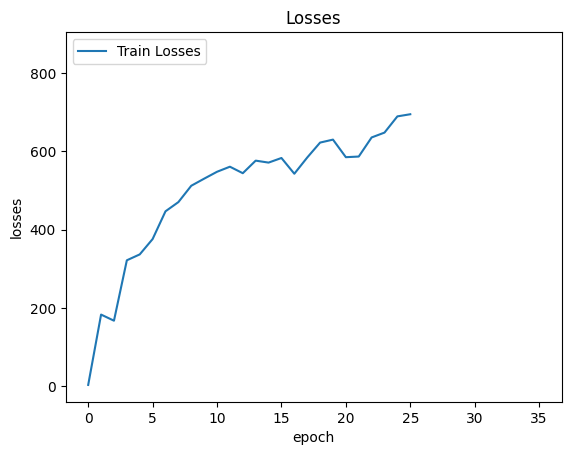

In [244]:

model = LogisticRegression(k=4, n=X_train.shape[1] , method="batch", alpha=0.01, max_iter=10000, lambda_=0.6, use_penalty=True)
model.fit(X_train, Y_train_encoded)
preds = model.predict(X_1test)
model.plot()

In [245]:
print("Report: ", classification_report(y_1test, yhat))

Report:                precision    recall  f1-score   support

           0       0.06      0.99      0.11       136
           1       0.14      0.01      0.02      1137
           2       0.44      0.01      0.03      1026
           3       0.00      0.00      0.00       110

    accuracy                           0.07      2409
   macro avg       0.16      0.25      0.04      2409
weighted avg       0.25      0.07      0.03      2409



In [263]:
import mlflow
import os

# Setting MLflow authentication credentials as environment variables
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'

# Pointing MLflow to the remote tracking server
mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th/")

# Set (and create if not exist) an experiment for tracking
mlflow.set_experiment("st124909-a3-Ridge")

2025/04/06 05:14:32 INFO mlflow.tracking.fluent: Experiment with name 'st124909-a3-Ridge' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/439733742680906594', creation_time=1743916882623, experiment_id='439733742680906594', last_update_time=1743916882623, lifecycle_stage='active', name='st124909-a3-Ridge', tags={}>

In [264]:
import mlflow.pyfunc
import cloudpickle

class CustomLogisticWrapper(mlflow.pyfunc.PythonModel):
    def __init__(self, trained_model):
        self.trained_model = trained_model

    def predict(self, context, model_input):
        return self.trained_model.predict(model_input)


c:\ML\MLenv\lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


In [265]:
import tempfile
import os
from sklearn.metrics import accuracy_score, f1_score
# Train model
model = LogisticRegression(k=4, n=X_train.shape[1], method="minibatch", alpha=0.01, max_iter=10000, lambda_=0.6, use_penalty=True)
model.fit(X_train, Y_train_encoded)
preds = model.predict(X_1test)

# คำนวณ metric
accuracy = accuracy_score(y_1test, preds)
f1 = f1_score(y_1test, preds, average="macro")

# Log everything to MLflow
with mlflow.start_run(run_name="ridge_logistic_run", nested=True):
    mlflow.log_param("model_type", "Custom LogisticRegression")
    mlflow.log_param("lambda_", model.lambda_)
    mlflow.log_param("method", model.method)
    mlflow.log_param("alpha", model.alpha)
    mlflow.log_param("max_iter", model.max_iter)

    # Log overall metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("macro_precision", macro_precision)
    mlflow.log_metric("macro_recall", macro_recall)
    mlflow.log_metric("macro_f1", macro_F1)

    # Log per-class metrics (optional)
    for i in range(num_classes):
        mlflow.log_metric(f"precision_class_{i}", precision_per_class[i])
        mlflow.log_metric(f"recall_class_{i}", recall_per_class[i])
        mlflow.log_metric(f"f1_class_{i}", f1_per_class[i])


Loss at iteration 0 3.6680750114400897
Loss at iteration 500 71.49940117529337
Loss at iteration 1000 87.16688789266126
Loss at iteration 1500 73.22151334499046
Loss at iteration 2000 60.78046299027453
Loss at iteration 2500 55.96540131104049
Loss at iteration 3000 80.65636476221158
Loss at iteration 3500 70.70581678659524
Loss at iteration 4000 79.10468182180406
Loss at iteration 4500 68.65947865642255
Loss at iteration 5000 81.22370315678033
Loss at iteration 5500 83.61398492532174
Loss at iteration 6000 87.08927861583534
Loss at iteration 6500 88.43697572236566
Loss at iteration 7000 64.21772116914306
Loss at iteration 7500 66.140936655001
Loss at iteration 8000 59.700950324580944
Loss at iteration 8500 71.74231495647976
Loss at iteration 9000 70.94734304651084
Loss at iteration 9500 82.6638847028258
time taken: 1.2698018550872803
🏃 View run ridge_logistic_run at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/439733742680906594/runs/5060144bf3dc48728d6ff80b02784bef
🧪 View exper

In [ ]:
import mlflow
import os

# Setting MLflow authentication credentials as environment variables
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'

# Pointing MLflow to the remote tracking server
mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th/")

# Set (and create if not exist) an experiment for tracking
mlflow.set_experiment("st124909-a3-Ridge")

<Experiment: artifact_location='mlflow-artifacts:/189153763932796199', creation_time=1743911296422, experiment_id='189153763932796199', last_update_time=1743913485834, lifecycle_stage='active', name='st124909-a3-Ridge', tags={}>

In [266]:
import tempfile
import os
from sklearn.metrics import accuracy_score, f1_score
# Train model
model = LogisticRegression(k=4, n=X_train.shape[1], method="minibatch", alpha=0.01, max_iter=10000, lambda_=0.6, use_penalty=True)
model.fit(X_train, Y_train_encoded)
preds = model.predict(X_1test)

# คำนวณ metric
accuracy = accuracy_score(y_1test, preds)
f1 = f1_score(y_1test, preds, average="macro")

# Log everything to MLflow
with mlflow.start_run(run_name="ridge_logistic_run", nested=True):
    mlflow.log_param("model_type", "Custom LogisticRegression")
    mlflow.log_param("lambda_", model.lambda_)
    mlflow.log_param("method", model.method)
    mlflow.log_param("alpha", model.alpha)
    mlflow.log_param("max_iter", model.max_iter)

    # Log overall metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("macro_precision", macro_precision)
    mlflow.log_metric("macro_recall", macro_recall)
    mlflow.log_metric("macro_f1", macro_F1)

    # Log per-class metrics (optional)
    for i in range(num_classes):
        mlflow.log_metric(f"precision_class_{i}", precision_per_class[i])
        mlflow.log_metric(f"recall_class_{i}", recall_per_class[i])
        mlflow.log_metric(f"f1_class_{i}", f1_per_class[i])


Loss at iteration 0 3.327789828143062
Loss at iteration 500 56.569657333603786
Loss at iteration 1000 63.99647576511465
Loss at iteration 1500 84.96045136138257
Loss at iteration 2000 76.14288058359247
Loss at iteration 2500 70.2231204520798
Loss at iteration 3000 74.03277603056486
Loss at iteration 3500 54.36441686033828
Loss at iteration 4000 85.65011100741613
Loss at iteration 4500 59.50750889270753
Loss at iteration 5000 87.83316786463705
Loss at iteration 5500 56.16163474808319
Loss at iteration 6000 72.32921952335569
Loss at iteration 6500 69.15336984234123
Loss at iteration 7000 79.00867235664943
Loss at iteration 7500 79.70830059540373
Loss at iteration 8000 99.44081220359368
Loss at iteration 8500 58.03282745139679
Loss at iteration 9000 62.478330919607856
Loss at iteration 9500 84.7440597300405
time taken: 1.2880656719207764
🏃 View run ridge_logistic_run at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/439733742680906594/runs/e9ac7d417b9a4883bf8c943241677322
🧪 View expe

In [268]:
import mlflow.pyfunc
import cloudpickle

class CustomLogisticWrapper(mlflow.pyfunc.PythonModel):
    def __init__(self, trained_model):
        self.trained_model = trained_model

    def predict(self, context, model_input):

        return self.trained_model.predict(model_input)


c:\ML\MLenv\lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


In [269]:
import tempfile
import os
import mlflow.pyfunc
import cloudpickle

# เริ่ม MLflow run
with mlflow.start_run(run_name="ridge_logistic_run", nested=True):
    # Log พารามิเตอร์และ metrics
    mlflow.log_param("model_type", "Custom LogisticRegression")
    mlflow.log_param("lambda_", model.lambda_)
    mlflow.log_param("method", model.method)
    mlflow.log_param("alpha", model.alpha)
    mlflow.log_param("max_iter", model.max_iter)

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("macro_f1", f1)

    # Log custom model (wrapper + original model)
    with tempfile.TemporaryDirectory() as tmp_dir:
        model_path = os.path.join(tmp_dir, "model.pkl")
        
        # Save the trained model using cloudpickle
        with open(model_path, "wb") as f:
            cloudpickle.dump(model, f)

        # Log the model using the wrapper
        mlflow.pyfunc.log_model(
            artifact_path="model",
            python_model=CustomLogisticWrapper(model),
            artifacts={"model_file": model_path}
        )


2025/04/06 05:15:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run ridge_logistic_run at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/439733742680906594/runs/b0d1ce7e49064921b03ded60bcc986e3
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/439733742680906594


In [270]:
import mlflow

# เริ่มต้น MLflow run
with mlflow.start_run(run_name="ridge_logistic_run", nested=True):
    # Log พารามิเตอร์ต่างๆ
    mlflow.log_param("model_type", "Custom LogisticRegression")
    mlflow.log_param("lambda_", model.lambda_)  # ถ้ามี
    mlflow.log_param("alpha", model.alpha)  # ถ้ามี
    mlflow.log_param("max_iter", model.max_iter)  # ถ้ามี
    
    # Log metrics เช่น accuracy
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("macro_f1", f1)

    # Log โมเดลด้วย Custom Wrapper
    mlflow.pyfunc.log_model(
        artifact_path="model",  # ระบุที่เก็บโมเดลใน MLflow
        python_model=CustomLogisticWrapper(model)  # ส่งโมเดลที่คุณสร้างเอง
    )



2025/04/06 05:15:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run ridge_logistic_run at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/439733742680906594/runs/155b2de0cad54cdd914b4ab0c09b20d0
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/439733742680906594
